# Idea: maybe try weighting by total turnout

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
elec_df = pd.read_csv(r"elec_df - 4-13-2021 (with boundary changes).csv")
collapsed_elec_df = elec_df.groupby(by=['state', 'year', 'district']).mean().reset_index()

In [12]:
elec_df['year'] = elec_df['year'].astype(str)
collapsed_elec_df['year'] = collapsed_elec_df['year'].astype(str)

elec_df['agricultural gdp X drought score'] = elec_df['agricultural_gdp'] * elec_df['drought_score']
elec_df['num farms X drought score'] = elec_df['num_farms'] * elec_df['drought_score']

elec_df['log_agricultural_gdp_X_drought_score_vs_avg'] = np.log(elec_df['agricultural_gdp']) * elec_df['drought_score_vs_avg']
elec_df['log_agricultural_gdp_X_drought_score_vs_avg'].replace([np.inf, -np.inf], 0, inplace=True)

elec_df['num_farms_X_drought_score_vs_avg'] = elec_df['num_farms'] * elec_df['drought_score_vs_avg']


collapsed_elec_df['log_agricultural_gdp_X_drought_score_vs_avg'] = np.log(collapsed_elec_df['agricultural_gdp']) * collapsed_elec_df['drought_score_vs_avg']
collapsed_elec_df['log_agricultural_gdp_X_drought_score_vs_avg'].replace([np.inf, -np.inf], 0, inplace=True)

collapsed_elec_df['num_farms_X_drought_score_vs_avg'] = collapsed_elec_df['num_farms'] * collapsed_elec_df['drought_score_vs_avg']

collapsed_elec_df['num farms X drought score'] = collapsed_elec_df['num_farms'] * collapsed_elec_df['drought_score']

collapsed_elec_df['num_farms_X_drought_score_vs_avg'] = collapsed_elec_df['num_farms'] * collapsed_elec_df['drought_score_vs_avg']

collapsed_elec_df['farm_size X drought score'] = collapsed_elec_df['farm_size'] * collapsed_elec_df['drought_score']

collapsed_elec_df['farm_size_X_drought_score_vs_avg'] = collapsed_elec_df['farm_size'] * collapsed_elec_df['drought_score_vs_avg']

elec_df['compressed_agricultural_gdp'] = elec_df['agricultural_gdp'] ** (1/4)
collapsed_elec_df['compressed_agricultural_gdp'] = collapsed_elec_df['agricultural_gdp'] ** (1/4)

# Plotting

In [5]:
def plot_with_trend(df, x, y):
    reg = smf.ols(formula=f'{y} ~ {x} + {x}*agricultural*DPres*D_East + year + state', data=df).fit(cov_type='HC3')
    print(reg.summary())

    fig, ax1 = plt.subplots()
    df.plot.scatter(x=x, y=y, c='compressed_agricultural_gdp', colormap='coolwarm', figsize=(15,10), xlabel=x.upper(), ylabel=y.upper(), s=df['compressed_agricultural_gdp']+.5, ax=ax1).autoscale()

    plot_x = np.arange(df[x].min(), df[x].max(), 10)

    non_agr, = ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*reg.params[f'{x}']) for fake_x_val in plot_x], color='blue', label='Non-Agricultural')
    agr, = ax1.plot(plot_x, [(reg.params['Intercept'] + reg.params['agricultural'] + fake_x_val*(reg.params[f'{x}'] + reg.params[f'{x}:agricultural'])) for fake_x_val in plot_x], color='red', label='Agricultural')

#     CI_lower_bound = reg.conf_int(alpha=.05).loc[x][0]
#     CI_upper_bound = reg.conf_int(alpha=.05).loc[x][1]
#     ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*CI_lower_bound) for fake_x_val in plot_x], linestyle='dashed', color='blue')
#     ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*CI_upper_bound) for fake_x_val in plot_x], linestyle='dashed', color='blue')

    plt.title(f'{y} vs. {x} \n Size=1(Agricultural) \n Color=Agricultural GDP \n Only elections in districts with <= {threshold*100}% geographical change from last election')
    plt.legend(handles=[non_agr, agr])
    plt.show()


## Testing plot function

In [6]:
# used for testing "plot_with_trend" function

# x = 'drought_score'
# y = 'totalturnout'
# df = collapsed_elec_df_subset.sort_values(by=f'{x}')

# reg = smf.ols(formula=f'{y} ~ {x} + {x}*agricultural*DPres*D_East + year + state', data=df).fit(cov_type='HC3')
# print(reg.summary())

# fig, ax1 = plt.subplots()
# df.plot.scatter(x=x, y=y, c='compressed_agricultural_gdp', colormap='coolwarm', figsize=(15,10), xlabel=x, ylabel=f"y={y.upper()}, x={x.upper()}", s=df['compressed_agricultural_gdp']+.5, ax=ax1).autoscale()

# plot_x = np.arange(df[x].min(), df[x].max(), 10)

# non_agr, = ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*reg.params[f'{x}']) for fake_x_val in plot_x], color='blue', label='Non-Agricultural')
# agr, = ax1.plot(plot_x, [(reg.params['Intercept'] + reg.params['agricultural'] + fake_x_val*(reg.params[f'{x}']) + reg.params[f'{x}:agricultural']) for fake_x_val in plot_x], color='red', label='Agricultural')

# # CI_lower_bound = reg.conf_int(alpha=.05).loc[x][0]
# # CI_upper_bound = reg.conf_int(alpha=.05).loc[x][1]
# # ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*CI_lower_bound) for fake_x_val in plot_x], linestyle='dashed', color='blue')
# # ax1.plot(plot_x, [(reg.params['Intercept'] + fake_x_val*CI_upper_bound) for fake_x_val in plot_x], linestyle='dashed', color='blue')

# plt.title(f'{y} vs. {x} \n Size=1(Agricultural) \n Color=Agricultural GDP \n Only elections in districts with <= {threshold*100}% geographical change from last election')
# plt.legend(handles=[non_agr, agr])
# plt.show()
    

## Plotting

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           totalturnout   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     1833.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:20:53   Log-Likelihood:                -31659.
No. Observations:                2603   AIC:                         6.346e+04
Df Residuals:                    2534   BIC:                         6.386e+04
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z    

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


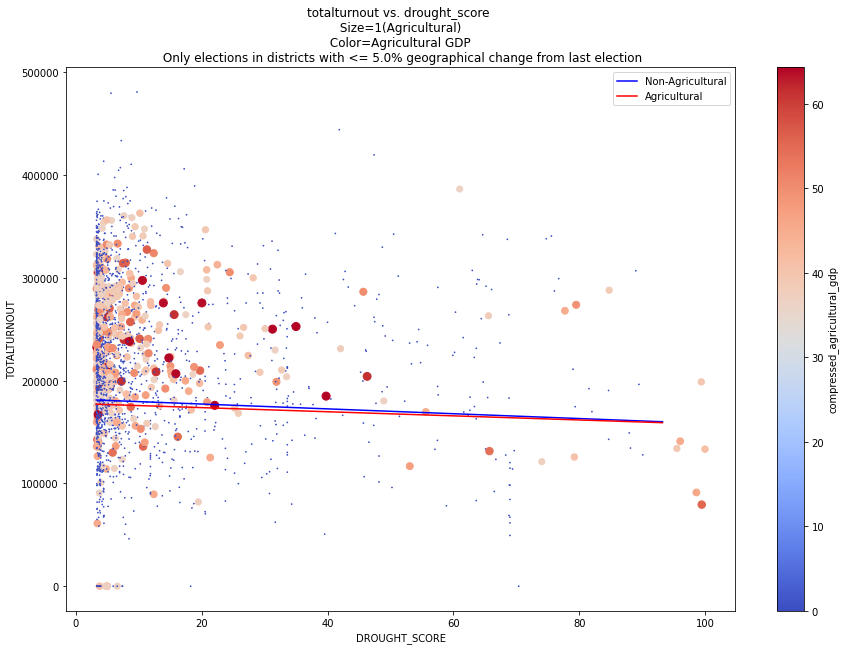

-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:             share_diff   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                     1.145
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.197
Time:                        01:20:54   Log-Likelihood:                 1069.5
No. Observations:                2184   AIC:                            -2001.
Df Residuals:                    2115   BIC:                            -1608.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

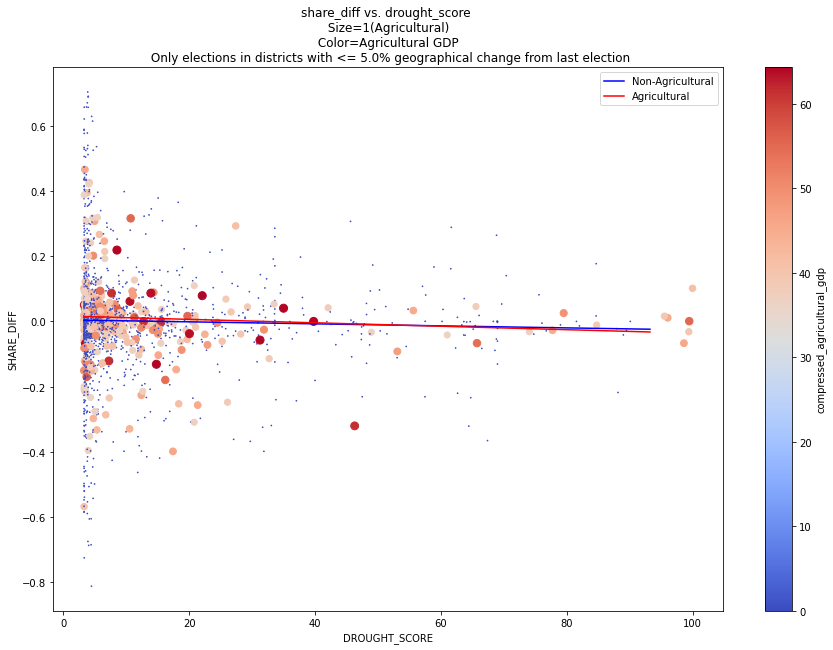

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:        Repub_voteshare   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     383.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:20:56   Log-Likelihood:                 813.93
No. Observations:                2337   AIC:                            -1490.
Df Residuals:                    2268   BIC:                            -1093.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z    

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


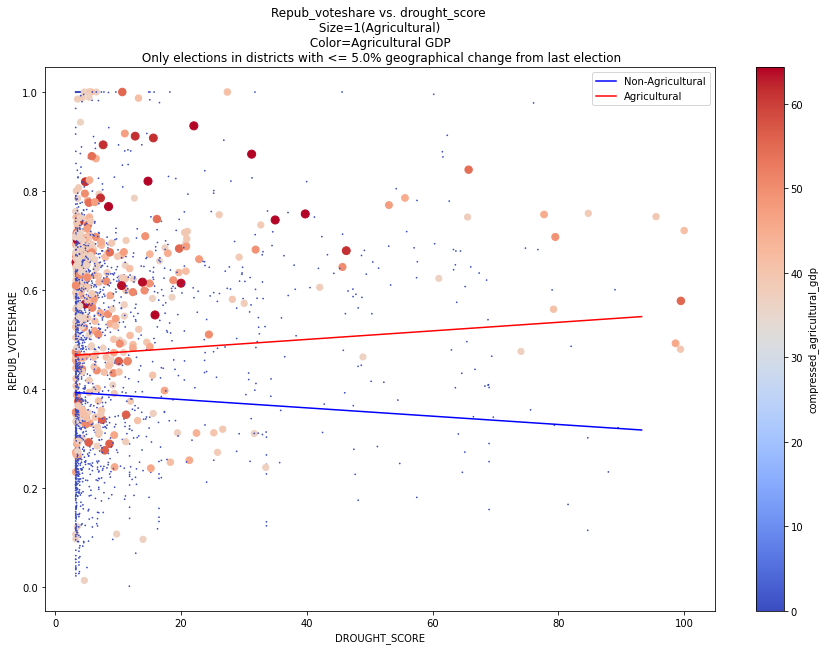

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         incumbent_lost   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.782
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           9.55e-05
Time:                        01:20:57   Log-Likelihood:                 2296.1
No. Observations:                2603   AIC:                            -4454.
Df Residuals:                    2534   BIC:                            -4049.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                              coef    std err          z    

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


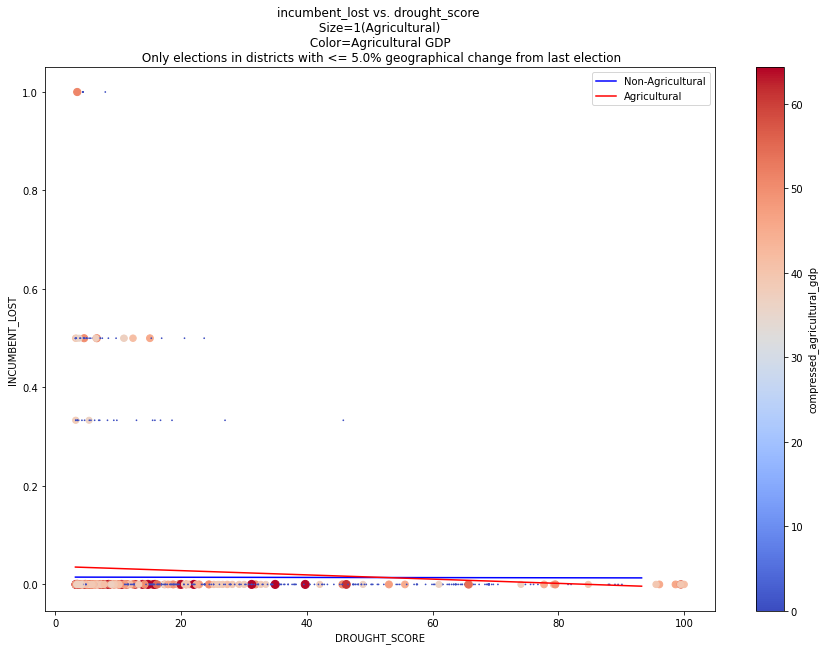

-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:           totalturnout   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1821.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:20:58   Log-Likelihood:                -31653.
No. Observations:                2603   AIC:                         6.344e+04
Df Residuals:                    2534   BIC:                         6.385e+04
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

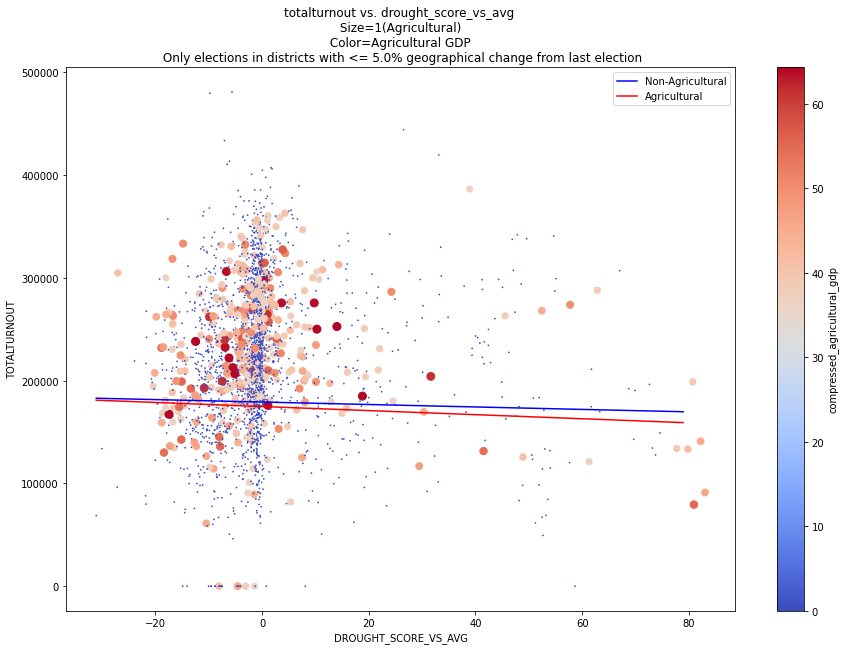

-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:             share_diff   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                     1.136
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.211
Time:                        01:21:00   Log-Likelihood:                 1070.5
No. Observations:                2184   AIC:                            -2003.
Df Residuals:                    2115   BIC:                            -1611.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

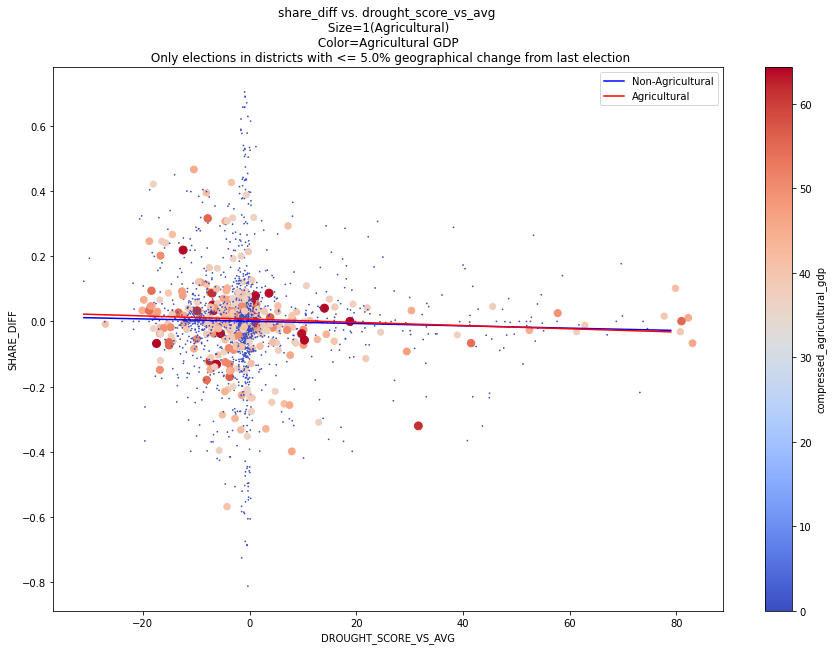

-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:        Repub_voteshare   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     379.6
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:21:01   Log-Likelihood:                 811.84
No. Observations:                2337   AIC:                            -1486.
Df Residuals:                    2268   BIC:                            -1088.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

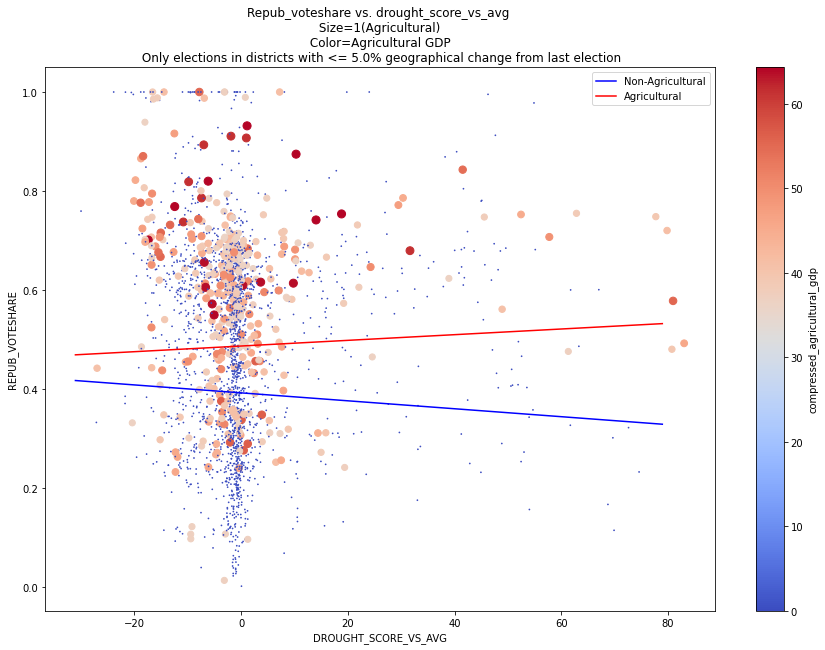

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         incumbent_lost   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.779
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           9.92e-05
Time:                        01:21:03   Log-Likelihood:                 2296.3
No. Observations:                2603   AIC:                            -4455.
Df Residuals:                    2534   BIC:                            -4050.
Df Model:                          68                                         
Covariance Type:                  HC3                                         
                                                     coef    std err        

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 69
  warnings.warn('covariance of constraints does not have full '


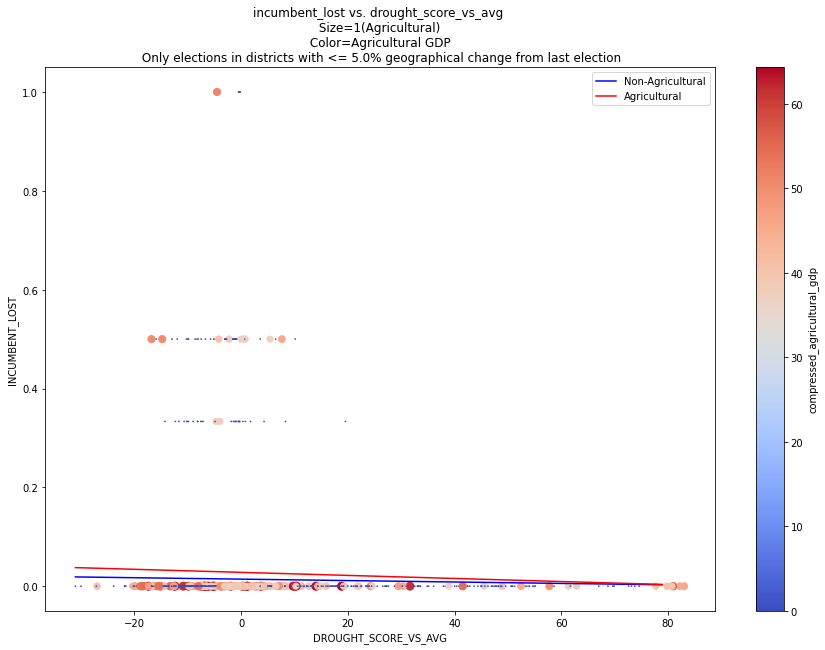

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:           totalturnout   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1921.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:21:04   Log-Likelihood:                -31533.
No. Observations:                2592   AIC:                         6.320e+04
Df Residuals:                    2527   BIC:                         6.358e+04
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                                                                            

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 65
  warnings.warn('covariance of constraints does not have full '


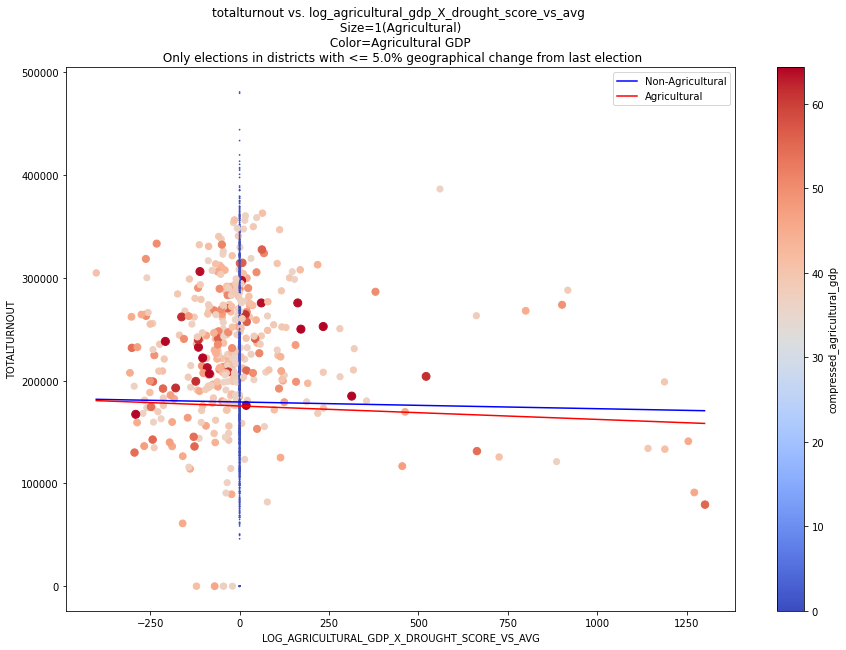

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:             share_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9592
Date:                Wed, 14 Apr 2021   Prob (F-statistic):              0.570
Time:                        01:21:06   Log-Likelihood:                 1066.0
No. Observations:                2174   AIC:                            -2002.
Df Residuals:                    2109   BIC:                            -1632.
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                                                                            

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 65
  warnings.warn('covariance of constraints does not have full '


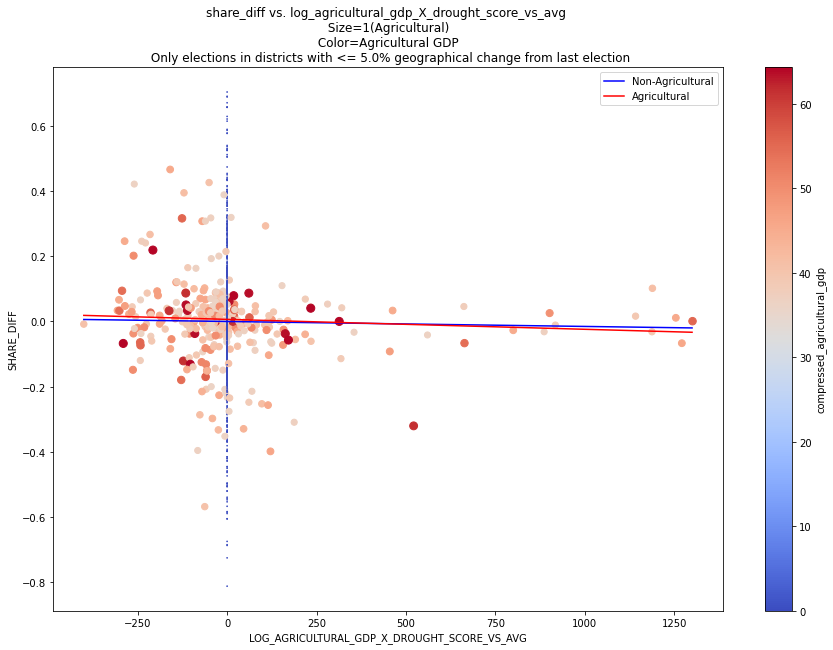

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:        Repub_voteshare   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     400.5
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:21:07   Log-Likelihood:                 808.43
No. Observations:                2326   AIC:                            -1487.
Df Residuals:                    2261   BIC:                            -1113.
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                                                                            

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 65
  warnings.warn('covariance of constraints does not have full '


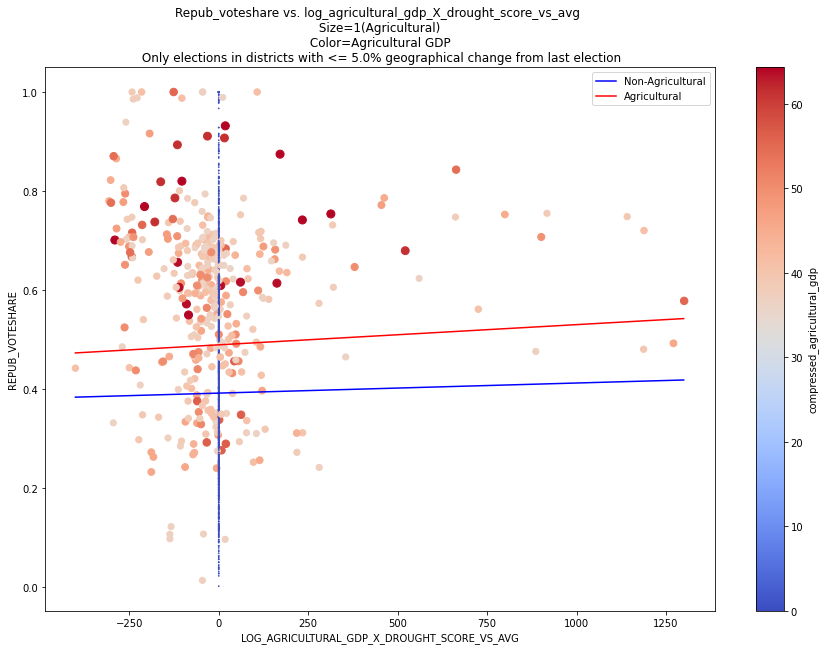

-------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         incumbent_lost   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.888
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.83e-05
Time:                        01:21:09   Log-Likelihood:                 2281.1
No. Observations:                2592   AIC:                            -4432.
Df Residuals:                    2527   BIC:                            -4051.
Df Model:                          64                                         
Covariance Type:                  HC3                                         
                                                                            

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 70, but rank is 65
  warnings.warn('covariance of constraints does not have full '


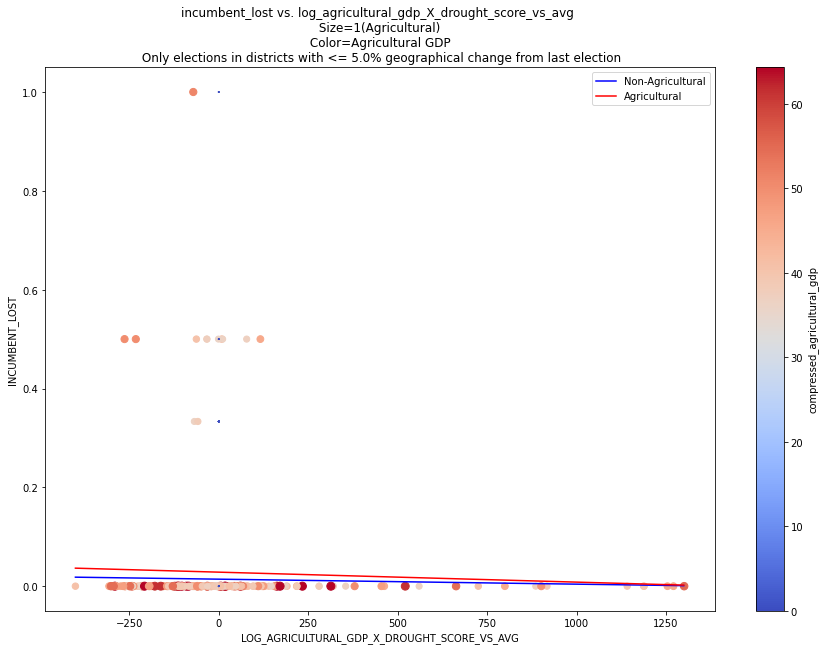

In [17]:
threshold=0.05
collapsed_elec_df_subset = collapsed_elec_df[collapsed_elec_df['area_difference'] <= threshold]

x_var_set = ['drought_score', 'drought_score_vs_avg', 'log_agricultural_gdp_X_drought_score_vs_avg']
y_var_set = ['totalturnout', 'share_diff', 'Repub_voteshare', 'incumbent_lost']

for x_var in x_var_set:
    for y_var in y_var_set:
        print('-------------------------------------------------------------------------------------------------------------------------------------')
        plot_with_trend(collapsed_elec_df_subset, x_var, y_var)
#         collapsed_elec_df_subset.plot.scatter(x=x_var, y=y_var, c='compressed_agricultural_gdp', colormap='coolwarm', figsize=(15,10), xlabel=x_var, ylabel=f"y={y_var.upper()}, x={x_var.upper()}", s=collapsed_elec_df_subset['compressed_agricultural_gdp']+.5).autoscale()